# Get Absolute Median Deviation of all Residuals
Calculate the AMD for all stars that have residuals and store them in a table to use.

In [24]:
import numpy as np
import pandas as pd
import os
import astropy.io.fits as fits
from astropy import stats
import matplotlib.pylab as plt

In [25]:
resid_folder = '/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRR_ind'

In [28]:
AMD_dict = {}

for which_star in np.arange(0, len(list_of_files)):

    APF_flux_path = list_of_files[which_star]
    file = fits.open(APF_flux_path)
    flux = file[0].data
    wl = file[1].data

    header = file[0].header
    star = header['OBJECT']
    abs_dev = stats.median_absolute_deviation(flux)
    
    if star in AMD_dict:
        AMD_dict[star] = AMD_dict[star] + [abs_dev]
    else:
        AMD_dict[star] = [abs_dev]

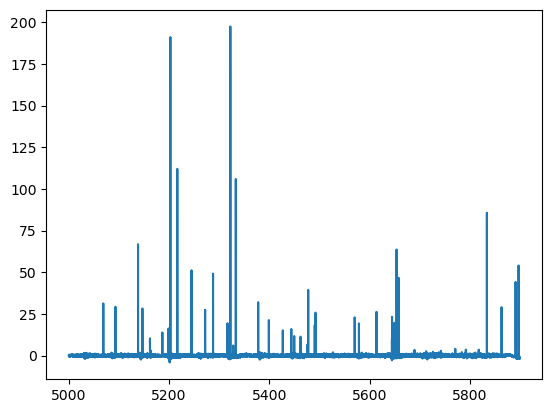

In [10]:
APF_flux_path = '/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRR_ind/GJ1002_0_NDRR.fits'
file = fits.open(APF_flux_path)
flux = file[1].data
wl = file[2].data

plt.plot(wl, flux)
plt.show()

In [52]:
stars = list(AMD_dict.keys())
resid_AMDs = []

for key in AMD_dict:
    AMDs = AMD_dict[key]
    resid_AMDs += [np.median(AMDs)]

In [55]:
resid_AMD_table = pd.DataFrame({'Star': stars, 'AMD Residual': resid_AMDs})

In [62]:
resid_AMD_table

,Star,AMD Residual
0,HIP94650,0.056224
1,HIP79137,0.055300
2,HIP102101,0.104098
3,HIP66781,0.042300
4,HIP6379,0.032163
...,...,...
793,HIP64394,0.018182
794,TIC352764091,0.024641
795,HIP42940,0.050732
796,HIP72220,0.007603


In [65]:
resid_AMD_table.to_pickle("/home/zoek/code/APF-BL-DAP/Zoe/resid_AMD.pkl")

In [82]:
star = 'HIP94650'
resid_AMD_table

,Star,AMD Residual
0,HIP94650,0.056224
1,HIP79137,0.055300
2,HIP102101,0.104098
3,HIP66781,0.042300
4,HIP6379,0.032163
...,...,...
793,HIP64394,0.018182
794,TIC352764091,0.024641
795,HIP42940,0.050732
796,HIP72220,0.007603


0.05622409245394322